## mplfinance - External Axes Method exercise

Goal: to plot OHLC data along with indicators using the **External Axes Method** of **mplfinance**.

Here I intentionally refrain from applying any chart style, I want to work with *blank canvas* style that can be further cutomized. This approach can be useful when we want to plot OHLC bars or candlesticks within an exiting chart that has already its own graphic design and customization.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplfinance as mpf
import sys

print(f"Python version: {sys.version}")
print(f"pandas version:  {pd.__version__}")
print(f"matplotlib version: {mpl.__version__}")
print(f"mplfinance version: {mpf.__version__}")

pd.plotting.register_matplotlib_converters()
%matplotlib inline

Python version: 3.7.7 (default, May  6 2020, 04:59:01) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version:  1.1.0
matplotlib version: 3.2.2
mplfinance version: 0.12.7a0


In [2]:
data = pd.read_csv("data/QQQ.csv", index_col="Date")
data.index = pd.to_datetime(data.index)

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-05,183.429993,183.509995,179.199997,180.729996,179.281570,75040000
2019-08-06,182.399994,183.800003,181.070007,183.259995,181.791306,41897200
2019-08-07,181.270004,184.509995,179.889999,184.250000,182.773376,49990600
2019-08-08,185.080002,188.320007,184.570007,188.259995,186.751236,38418100
2019-08-09,187.360001,188.000000,185.029999,186.490005,184.995422,33608900
...,...,...,...,...,...,...
2020-07-30,257.739990,261.709991,256.549988,261.130005,261.130005,41774500
2020-07-31,265.910004,265.950012,260.850006,265.790009,265.790009,53756200
2020-08-03,268.000000,270.149994,267.869995,269.380005,269.380005,32081600


I add three moving averages to the data frame:

In [3]:
sma_span = 40
ema_span = 15

data['H_sma'] = data['High'].rolling(sma_span).mean()
data['L_sma'] = data['Low'].rolling(sma_span).mean()
data['C_ema'] = data['Close'].ewm(span=ema_span).mean()

data

,Open,High,Low,Close,Adj Close,Volume,H_sma,L_sma,C_ema
Date,,,,,,,,,
2019-08-05,183.429993,183.509995,179.199997,180.729996,179.281570,75040000,NaN,NaN,180.729996
2019-08-06,182.399994,183.800003,181.070007,183.259995,181.791306,41897200,NaN,NaN,182.079329
2019-08-07,181.270004,184.509995,179.889999,184.250000,182.773376,49990600,NaN,NaN,182.901358
2019-08-08,185.080002,188.320007,184.570007,188.259995,186.751236,38418100,NaN,NaN,184.520014
2019-08-09,187.360001,188.000000,185.029999,186.490005,184.995422,33608900,NaN,NaN,185.025564
...,...,...,...,...,...,...,...,...,...
2020-07-30,257.739990,261.709991,256.549988,261.130005,261.130005,41774500,253.50025,248.366251,258.926786
2020-07-31,265.910004,265.950012,260.850006,265.790009,265.790009,53756200,254.20425,249.045501,259.784689
2020-08-03,268.000000,270.149994,267.869995,269.380005,269.380005,32081600,254.95050,249.851501,260.984104


For visual clarity, I select only the last 100 rows:

In [4]:
data_sel = data[-100:]

In the next chart, if I use `show_nontrading = False` I obtain an error. This is due to the mplfinance feature that removes days with no trading data from the *x* axis.

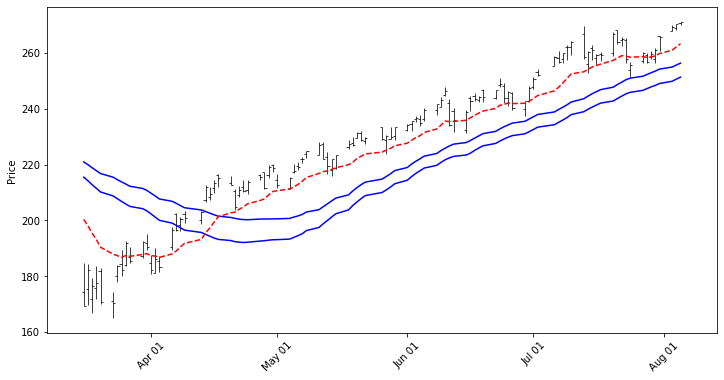

In [5]:
# here I could use mpf.figure() if I wanted to employ a chart style
# I just use the plain default from matplotlib
fig = plt.figure(figsize=(12,6))

ax = plt.subplot(1,1,1)
mpf.plot(data_sel, ax=ax, show_nontrading = True)
ax.plot(data_sel['H_sma'], color='blue')
ax.plot(data_sel['L_sma'], color='blue')
ax.plot(data_sel['C_ema'], color='red', linestyle = '--')

The following **workaround** seems to be solve the problem:

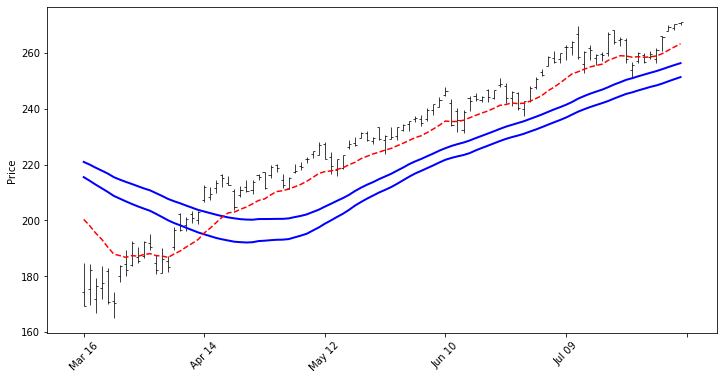

In [6]:
import numpy as np
xpoints = np.arange(len(data_sel))

fig = plt.figure(figsize=(12,6))

ax = plt.subplot(1,1,1)
# show_nontrading defaults to False:
mpf.plot(data_sel, ax=ax)
ax.plot(xpoints, data_sel['H_sma'], color='blue', linewidth = 2)
ax.plot(xpoints, data_sel['L_sma'], color='blue', linewidth =2)
ax.plot(xpoints, data_sel['C_ema'], color='red', linestyle = '--', linewidth = 1.5)

I could obtain a similar result using the `addplot` feature, although I was not successful when passing `linewidth` as keyword argument.

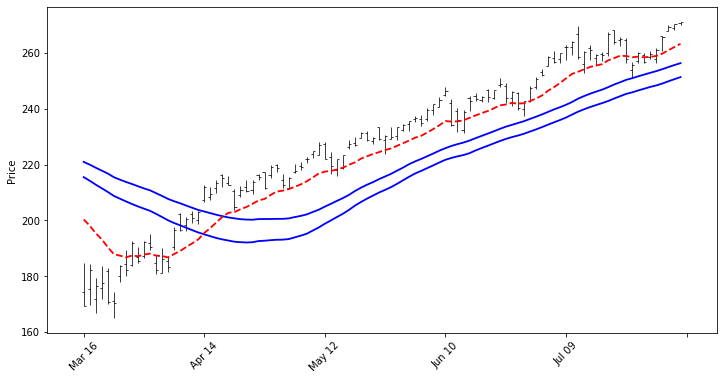

In [7]:
fig = plt.figure(figsize=(12,6))

ax = plt.subplot(1,1,1)
ap1 = mpf.make_addplot(data_sel[['H_sma', 'L_sma']], color = 'blue', ax = ax)
ap2 = mpf.make_addplot(data_sel['C_ema'], color = 'red', linestyle='--', ax = ax)
mpf.plot(data_sel, ax=ax, addplot = [ap1, ap2])

I can use the same workaround to create a chart with an indicator subplot, where the subplot does not make use of mplfinance.

Text(0, 0.5, '% ROC')

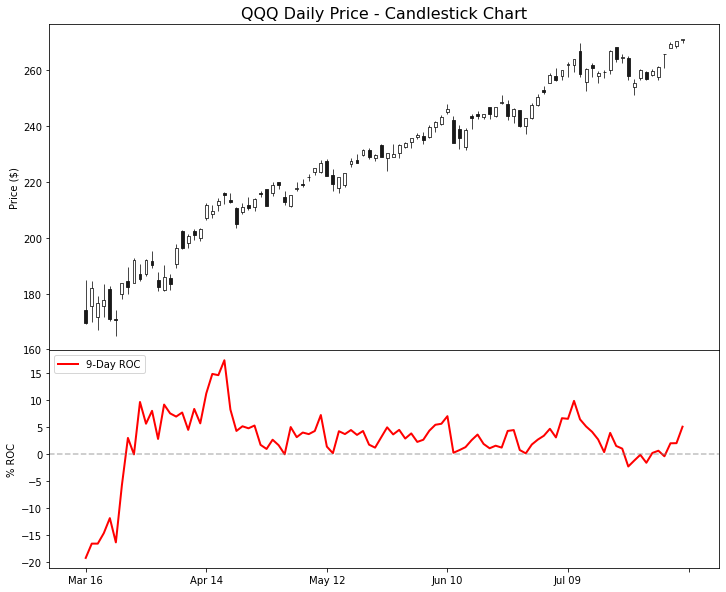

In [8]:
# Adding data for a ROC indicator with lag=9
lag = 9
data['ROC'] = ( data['Adj Close'] / data['Adj Close'].shift(lag) -1 ) * 100

data_sel = data[-100:]
xpoints = np.arange(len(data_sel))

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12,10))
gspec = gridspec.GridSpec(nrows=2, ncols=1, figure=fig, height_ratios= [3, 2])

price_ax = plt.subplot(gspec[0, 0])
roc_ax = plt.subplot(gspec[1,0], sharex=price_ax)

price_ax.set_title("QQQ Daily Price - Candlestick Chart", fontsize=16)

# Using mplfinance to plot a candlestick chart on price_ax:
mpf.plot(data_sel, ax=price_ax, type='candlestick')

# Plotting the ROC indicator using the workaround:
roc_ax.plot(xpoints, data_sel['ROC'], label="9-Day ROC", color="red", linewidth=2)
roc_ax.legend(loc="upper left")

price_ax.get_xaxis().set_visible(False)
fig.subplots_adjust(hspace=0)
roc_ax.axhline(0, color = (.5, .5, .5), linestyle = '--', alpha = 0.5)
price_ax.set_ylabel("Price ($)")
roc_ax.set_ylabel("% ROC")